In [8]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, ShuffleSplit, StratifiedKFold, GridSearchCV
from sklearn.metrics import confusion_matrix, roc_curve, classification_report
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.manifold import MDS, Isomap
from sklearn.manifold import LocallyLinearEmbedding as LLE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import TSNE
import joblib, random
import numpy as np
import cv2
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

In [9]:
class_names = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', '$', '#']

In [10]:
# Loading Test Data
X_test = np.load('Data/data_test.npy').T
t_test = np.load('Data/labels_test.npy')

print(X_test.shape, t_test.shape)

(2880, 90000) (2880,)


In [11]:
#Resizing the image since kernel was dying.

NEW_SIZE = (50,50)
INTERPOLATION = cv2.INTER_CUBIC
data = []

for i in range(2880):
    img = X_test[i,:].reshape(300,300)
    img = cv2.resize(img, NEW_SIZE[::-1], interpolation=INTERPOLATION)
    data.append(img.flatten())

X_test_resized = np.array(data)
X_test_resized.shape

(2880, 2500)

#### 1: RFE

##### Estimator 1: Logistic Regression

In [7]:
#Tranformation into lower dimension
LR_RFE = joblib.load('Models/LR_RFE1.pkl')
x_test_lr=LR_RFE.transform(X_test_resized)

print("Feature size:",x_test_lr.shape[1])


Feature size: 700


In [22]:
y_test_lr=LR_RFE.predict(X_test_resized)
print('\n\nTraining Set Performance for Logistic Regression Classifier')
print('Accuracy Score:', accuracy_score(t_test, y_test_lr))

print('Confusion Matrix:')
print(confusion_matrix(t_test, y_test_lr))
print('Performance Report: ')
print(classification_report(t_test, y_test_lr))
print('\n\n')



Training Set Performance for Logistic Regression Classifier
Accuracy Score: 0.35555555555555557
Confusion Matrix:
[[109  17  26  24  13   8  20  33  13  12]
 [ 14  91  19  16  17  17  19  45  18  14]
 [ 19  15 133  10  33  16  19  18  11  13]
 [ 38  12  29  98  16  17  32  18  16  19]
 [ 19  23  61  21  87  25  19  24  18  12]
 [  7  24  28  23  14  99  23  19  45  15]
 [ 18  18  23  29  11  22 109  14  26  21]
 [ 22  30  40  14  14   8  13 114  10  13]
 [ 23  19  17  26   6  29  43  15  92  22]
 [ 19  18  10  19  28  23  27  26  24  92]]
Performance Report: 
              precision    recall  f1-score   support

         0.0       0.38      0.40      0.39       275
         1.0       0.34      0.34      0.34       270
         2.0       0.34      0.46      0.40       287
         3.0       0.35      0.33      0.34       295
         4.0       0.36      0.28      0.32       309
         5.0       0.38      0.33      0.35       297
         6.0       0.34      0.37      0.35       291

In [19]:
x_test_lr=LR_RFE.transform(X_test_resized)

##### Estimator 2: Random Forest

In [25]:
#Tranformation into lower dimension
RF_RFE = joblib.load('Models/Random_Forest_RFE1.pkl')
x_test_rf=RF_RFE.transform(X_test_resized)

print("Feature size:",x_test_rf.shape[1])

Feature size: 1000


In [26]:


y_test_rf=RF_RFE.predict(X_test_resized)
print('\n\nTraining Set Performance for Random Forest Classifier')
print('Accuracy Score:', accuracy_score(t_test, y_test_rf))

print('Confusion Matrix:')
print(confusion_matrix(t_test, y_test_rf))
print('Performance Report: ')
print(classification_report(t_test, y_test_rf))
print('\n\n')



Training Set Performance for Random Forest Classifier
Accuracy Score: 0.4309027777777778
Confusion Matrix:
[[128  18  26  20   9  16  17  15  11  15]
 [ 21 101  35  10  17  20   6  35  17   8]
 [ 14  18 195   5  22  13   9   9   1   1]
 [ 34  18  34 111  10  19  24  18  16  11]
 [ 18  23  62  10 123  22  16  16  10   9]
 [ 18  27  41  16  13 108  20  16  30   8]
 [ 24  14  26  26  11  19 122  12  19  18]
 [ 22  45  43  11   9  15  11 103  10   9]
 [ 15  22  18  11   2  39  24  16 131  14]
 [ 23  18  23  20  10  18  19  16  20 119]]
Performance Report: 
              precision    recall  f1-score   support

         0.0       0.40      0.47      0.43       275
         1.0       0.33      0.37      0.35       270
         2.0       0.39      0.68      0.49       287
         3.0       0.46      0.38      0.41       295
         4.0       0.54      0.40      0.46       309
         5.0       0.37      0.36      0.37       297
         6.0       0.46      0.42      0.44       291
      

#### 2: PCA

In [31]:
#Tranformation into lower dimension
PCA = joblib.load('Models/PCA2.pkl')

x_test_pca=PCA.transform(X_test_resized)

print("Feature size:",x_test_pca.shape[1])

Feature size: 182


In [33]:
#Performance for with classifier with PCA
PCA = joblib.load('Models/LR_PCA2.pkl')

y_test1 = PCA.predict(X_test_resized)

print('Test Set Performance for model with PCA')
print('Accuracy Score:', accuracy_score(t_test, y_test1))
print('Confusion Matrix:')
print(confusion_matrix(t_test,y_test1))
print('\nPerformance Report: ')
print(classification_report(t_test,y_test1))
print('\n\n')

Training Set Performance for model with PCA
Accuracy Score: 0.3958333333333333
Confusion Matrix:
[[124  13  28  23  16   4  16  28  12  11]
 [ 13  97  20  20  15  13  12  44  18  18]
 [ 11  17 153  23  27   9  19  17   3   8]
 [ 47  13  31 117  14  21  26  11   9   6]
 [ 19  24  59  20 102  29  16  17   9  14]
 [  8  21  30  25  19 114  23  17  32   8]
 [ 21  15  15  28  13  21 123  12  24  19]
 [ 24  36  33  18  18   7   4 116  11  11]
 [ 14  24   9  16  10  31  40  21 102  25]
 [ 11  11  17  21  31  27  23  30  23  92]]

Performance Report: 
              precision    recall  f1-score   support

         0.0       0.42      0.45      0.44       275
         1.0       0.36      0.36      0.36       270
         2.0       0.39      0.53      0.45       287
         3.0       0.38      0.40      0.39       295
         4.0       0.38      0.33      0.36       309
         5.0       0.41      0.38      0.40       297
         6.0       0.41      0.42      0.41       291
         7.0     

In [35]:
#Performance for with classifier without PCA
NOPCA = joblib.load('Models/LR_NOPCA2.pkl')

y_test2 = NOPCA.predict(X_test_resized)

print('Test Set Performance for model without PCA')
print('Accuracy Score:', accuracy_score(t_test, y_test2))
print('Confusion Matrix:')
print(confusion_matrix(t_test,y_test2))
print('\nPerformance Report: ')
print(classification_report(t_test,y_test2))
print('\n\n')

Test Set Performance for model without PCA
Accuracy Score: 0.34930555555555554
Confusion Matrix:
[[110  13  23  31  10  13  24  22  18  11]
 [ 20  86  22  19  15  11  22  42  16  17]
 [ 21  13 139  12  37  12  19  14  10  10]
 [ 43  16  26  98  22  21  25  11  15  18]
 [ 23  20  59  18  80  33  26  15  14  21]
 [ 12  22  26  20  20 102  27  16  37  15]
 [ 17  15  26  19  13  28 117   8  22  26]
 [ 33  27  37  12  10  11  12 115  12   9]
 [ 20  23  14  16   8  28  57  21  80  25]
 [ 28  15  19  21  28  22  24  26  24  79]]

Performance Report: 
              precision    recall  f1-score   support

         0.0       0.34      0.40      0.37       275
         1.0       0.34      0.32      0.33       270
         2.0       0.36      0.48      0.41       287
         3.0       0.37      0.33      0.35       295
         4.0       0.33      0.26      0.29       309
         5.0       0.36      0.34      0.35       297
         6.0       0.33      0.40      0.36       291
         7.0     

#### 3: Fisher's LDA and t-SNE

Feature size: 8


/scratch/local/15693744/ipykernel_3771019/3406836565.py:13: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar();


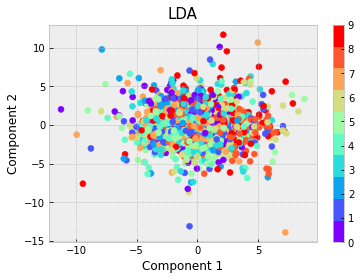

In [14]:
#Tranformation into lower dimension for FLDA
LDA = joblib.load('Models/LR_LDA3.pkl')

x_test_lda=LDA.transform(X_test_resized)

print("Feature size:",x_test_lda.shape[1])


plt.scatter(x_test_lda[:,0], x_test_lda[:,1], c=t_test, cmap=plt.cm.get_cmap('rainbow', 10))
plt.title('LDA', fontsize=15)
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.colorbar();

Feature size: 3


/apps/python/3.10/lib/python3.10/site-packages/matplotlib/collections.py:981: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/scratch/local/15693744/ipykernel_3771019/944551577.py:13: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar();


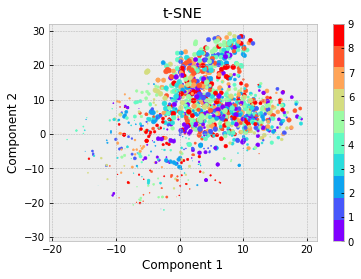

In [15]:
#Tranformation into lower dimension for t-SNE         ??
#t-SNE is used for visualization

SNE = joblib.load('Models/LR_tSNE3.pkl')

x_test_sne = SNE.fit_transform(X_test_resized)
print("Feature size:",x_test_sne.shape[1])

plt.scatter(x_test_sne[:,0], x_test_sne[:,1],x_test_sne[:,2], c=t_test, cmap=plt.cm.get_cmap('rainbow', 10))
plt.title("t-SNE")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.colorbar();

#### 4: Manifold Learning

In [19]:
#Tranformation into lower dimension for tMDS
MDS = joblib.load('Models/MDS4.pkl')
clf = joblib.load('Models/MDSclf.pkl')

x_test_mds = MDS.fit_transform(X_test_resized)

print("Feature size:",x_test_mds.shape[1])

y_test = clf.predict(x_test_mds)

print('\n\n Test Set Performance for MDS')
print('Accuracy Score:', accuracy_score(t_test, y_test))
print('Confusion Matrix:')
print(confusion_matrix(t_test,y_test))
print('\nPerformance Report: ')
print(classification_report(t_test,y_test))
print('\n\n')


Feature size: 300


 Test Set Performance for MDS
Accuracy Score: 0.103125
Confusion Matrix:
[[37 25 24 57 24 20 20 17 36 15]
 [32 22 20 75 21 12 14 29 29 16]
 [45 23 25 75 22 17 18 22 29 11]
 [40 34 22 79 17 18 28 18 23 16]
 [39 37 28 78 22 22 18 19 28 18]
 [48 37 23 71 29 12  9 18 29 21]
 [27 27 20 89 18 14 23 30 24 19]
 [43 32 19 79 15 11 12 21 31 15]
 [38 29 15 96 25 15 15 13 24 22]
 [24 33 17 80 14 14 15 27 30 32]]

Performance Report: 
              precision    recall  f1-score   support

         0.0       0.10      0.13      0.11       275
         1.0       0.07      0.08      0.08       270
         2.0       0.12      0.09      0.10       287
         3.0       0.10      0.27      0.15       295
         4.0       0.11      0.07      0.09       309
         5.0       0.08      0.04      0.05       297
         6.0       0.13      0.08      0.10       291
         7.0       0.10      0.08      0.09       278
         8.0       0.08      0.08      0.08       292
         9.0 

In [20]:
#Tranformation into lower dimension for LLE

LLE = joblib.load('Models/LLE4.pkl')
clf = joblib.load('Models/lleclf.pkl')

x_test_lle = LLE.fit_transform(X_test_resized) # ?????

print("Feature size:",x_test_lle.shape[1])

y_test = clf.predict(x_test_lle)

print('\n\n Test Set Performance for LLE')
print('Accuracy Score:', accuracy_score(t_test, y_test))
print('Confusion Matrix:')
print(confusion_matrix(t_test,y_test))
print('\nPerformance Report: ')
print(classification_report(t_test,y_test))
print('\n\n')




Feature size: 182


 Test Set Performance for LLE
Accuracy Score: 0.10729166666666666
Confusion Matrix:
[[18 27 49 26 11 22 22 28 46 26]
 [32 32 30 21 25 17 23 48 24 18]
 [30 31 52 17 29 20 25 32 27 24]
 [29 22 32 31 19 37 19 34 49 23]
 [33 28 44 33 14 33 20 39 38 27]
 [38 34 30 14 19 33 16 40 41 32]
 [37 32 31 21 32 30 22 23 42 21]
 [45 30 21 22 13 42 16 45 23 21]
 [34 31 37 23 31 23 21 33 47 12]
 [49 31 24 33 18 33 17 34 32 15]]

Performance Report: 
              precision    recall  f1-score   support

         0.0       0.05      0.07      0.06       275
         1.0       0.11      0.12      0.11       270
         2.0       0.15      0.18      0.16       287
         3.0       0.13      0.11      0.12       295
         4.0       0.07      0.05      0.05       309
         5.0       0.11      0.11      0.11       297
         6.0       0.11      0.08      0.09       291
         7.0       0.13      0.16      0.14       278
         8.0       0.13      0.16      0.14       292
  

In [21]:
#Tranformation into lower dimension for Isomap

ISO = joblib.load('Models/Isomap4.pkl')
clf = joblib.load('Models/isoclf.pkl')

x_test_iso = ISO.fit_transform(X_test_resized) # ?????

print("Feature size:",x_test_iso.shape[1])


y_test = clf.predict(x_test_iso)

print('\n\n Test Set Performance for ISOMAP')
print('Accuracy Score:', accuracy_score(t_test, y_test))
print('Confusion Matrix:')
print(confusion_matrix(t_test,y_test))
print('\nPerformance Report: ')
print(classification_report(t_test,y_test))
print('\n\n')


Feature size: 182


 Test Set Performance for ISOMAP
Accuracy Score: 0.10208333333333333
Confusion Matrix:
[[23 34 36 25 20 30 38 22 26 21]
 [25 48 22 18 29 24 31 24 34 15]
 [34 37 35 28 22 23 28 25 26 29]
 [28 21 41 30 34 26 25 30 30 30]
 [44 40 30 17 18 28 39 25 29 39]
 [38 46 24 25 25 35 25 26 26 27]
 [24 38 40 18 32 26 21 29 23 40]
 [30 34 22 24 31 27 32 21 25 32]
 [33 34 24 25 20 37 29 14 38 38]
 [24 34 35 26 24 32 29 26 31 25]]

Performance Report: 
              precision    recall  f1-score   support

         0.0       0.08      0.08      0.08       275
         1.0       0.13      0.18      0.15       270
         2.0       0.11      0.12      0.12       287
         3.0       0.13      0.10      0.11       295
         4.0       0.07      0.06      0.06       309
         5.0       0.12      0.12      0.12       297
         6.0       0.07      0.07      0.07       291
         7.0       0.09      0.08      0.08       278
         8.0       0.13      0.13      0.13       292